# Marvel Avengers Script Analysis
---

### Table of Content: 
- Data Preparation
- Determining Word Frequency
- Custom NER Model Training
- Text Analysis
- Data Visualization
- Text Summarization

## Data Preparation
---
Parsing the PDF file <br> 
Performing data cleaning procedures to prep data for model training

#### PDF File Loading:

In [2]:
#setup
import PyPDF2
import spacy

#loading the PDF file using open() in read binary mode
pdf_file = open('Avengers Script.pdf', 'rb')
pdf_reader = PyPDF2.PdfReader(pdf_file)

#extracting the text from each page of the PDF file and concatenating them to form a single string
text = ''
for page in pdf_reader.pages:
    text += page.extract_text()
text

'Marvel’s THE AVENGERS\nWritten By\nJoss Whedon\nStory By\nZak Penn and Joss Whedon\nBased on the characters appearing in the comic books\nPublished by MARVEL Comics1 EXT. UNKNOWN AREA OF SPACE 1\nSpace, a floating staircase among the rocks...THE OTHER\nspeaks to a DISEMBODIED FIGURE in a chair.\nTHE OTHER (V.O)\nThe Tesseract has awakened. It is\non a little world, a human world.\nThey would wield its power.\nTHE OTHER hands LOKI a scepter with a glowing blue gem...\nTHE OTHER (V.O)\nBut our ally knows its workings as\nthey never will. He is ready to\nlead. And our force...\nThe CHITAURI put on their face mask and get ready.\nTHE OTHER (V.O)\n...our Chitauri, will follow. The\nworld will be his...the universe,\nyours. And the humans, what can\nthey do but burn?\nA 3d model of the Tesseract, we move inside it slowly\n2 EXT. MOUNTAIN RANGE - EARLY NIGHT 2\nA helicopter SPEEDS over this mountain at high-speed. The\nCAMERA pans up over the mountain and we see...\n3 EXT. SHIELD/NASA FACILI

#### Data Cleaning Step #1:
Removing newlines and carriage returns

In [3]:
#deleting '\n' and '\r' via 'replace()'
cleaned_text = text.replace('\n', ' ').replace('\r', '')
cleaned_text

'Marvel’s THE AVENGERS Written By Joss Whedon Story By Zak Penn and Joss Whedon Based on the characters appearing in the comic books Published by MARVEL Comics1 EXT. UNKNOWN AREA OF SPACE 1 Space, a floating staircase among the rocks...THE OTHER speaks to a DISEMBODIED FIGURE in a chair. THE OTHER (V.O) The Tesseract has awakened. It is on a little world, a human world. They would wield its power. THE OTHER hands LOKI a scepter with a glowing blue gem... THE OTHER (V.O) But our ally knows its workings as they never will. He is ready to lead. And our force... The CHITAURI put on their face mask and get ready. THE OTHER (V.O) ...our Chitauri, will follow. The world will be his...the universe, yours. And the humans, what can they do but burn? A 3d model of the Tesseract, we move inside it slowly 2 EXT. MOUNTAIN RANGE - EARLY NIGHT 2 A helicopter SPEEDS over this mountain at high-speed. The CAMERA pans up over the mountain and we see... 3 EXT. SHIELD/NASA FACILITY - CONTINUOUS 3 This base 

#### Data Cleaning Step #2:
Removing stopwords from the extracted text

In [4]:
#setup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#creating a set that contains the list of stopwords for English language
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [5]:
#splitting the 'cleaned_text' string into a list of words
words = cleaned_text.split()
words

['Marvel’s',
 'THE',
 'AVENGERS',
 'Written',
 'By',
 'Joss',
 'Whedon',
 'Story',
 'By',
 'Zak',
 'Penn',
 'and',
 'Joss',
 'Whedon',
 'Based',
 'on',
 'the',
 'characters',
 'appearing',
 'in',
 'the',
 'comic',
 'books',
 'Published',
 'by',
 'MARVEL',
 'Comics1',
 'EXT.',
 'UNKNOWN',
 'AREA',
 'OF',
 'SPACE',
 '1',
 'Space,',
 'a',
 'floating',
 'staircase',
 'among',
 'the',
 'rocks...THE',
 'OTHER',
 'speaks',
 'to',
 'a',
 'DISEMBODIED',
 'FIGURE',
 'in',
 'a',
 'chair.',
 'THE',
 'OTHER',
 '(V.O)',
 'The',
 'Tesseract',
 'has',
 'awakened.',
 'It',
 'is',
 'on',
 'a',
 'little',
 'world,',
 'a',
 'human',
 'world.',
 'They',
 'would',
 'wield',
 'its',
 'power.',
 'THE',
 'OTHER',
 'hands',
 'LOKI',
 'a',
 'scepter',
 'with',
 'a',
 'glowing',
 'blue',
 'gem...',
 'THE',
 'OTHER',
 '(V.O)',
 'But',
 'our',
 'ally',
 'knows',
 'its',
 'workings',
 'as',
 'they',
 'never',
 'will.',
 'He',
 'is',
 'ready',
 'to',
 'lead.',
 'And',
 'our',
 'force...',
 'The',
 'CHITAURI',
 'put',

In [6]:
#creating a list that contains only the words from the 'words' list that are NOT in the 'stop_words' set
#filtering out stopwords from the 'words' list 
filtered_words = [word for word in words if word.lower() not in stop_words]
filtered_text = " ".join(filtered_words)
filtered_text

'Marvel’s AVENGERS Written Joss Whedon Story Zak Penn Joss Whedon Based characters appearing comic books Published MARVEL Comics1 EXT. UNKNOWN AREA SPACE 1 Space, floating staircase among rocks...THE speaks DISEMBODIED FIGURE chair. (V.O) Tesseract awakened. little world, human world. would wield power. hands LOKI scepter glowing blue gem... (V.O) ally knows workings never will. ready lead. force... CHITAURI put face mask get ready. (V.O) ...our Chitauri, follow. world his...the universe, yours. humans, burn? 3d model Tesseract, move inside slowly 2 EXT. MOUNTAIN RANGE - EARLY NIGHT 2 helicopter SPEEDS mountain high-speed. CAMERA pans mountain see... 3 EXT. SHIELD/NASA FACILITY - CONTINUOUS 3 base grand beyond belief. frantic evacuation progress. AGENTS, SCIENTISTS, PERSONNEL rush around base frantically. INTERCOM VOICE personnel, evacuation order confirmed. Proceed designated vehicles... man flushes people by. sign building reads: JOINT DARK ENERGY MISSION; WESTERN DIVISION; PROJECT P

#### Data Cleaning Step #3:
Converting all text to lowercase

In [7]:
#modifying each word in the script to lowercase
updated_text = filtered_text.lower()
updated_text

'marvel’s avengers written joss whedon story zak penn joss whedon based characters appearing comic books published marvel comics1 ext. unknown area space 1 space, floating staircase among rocks...the speaks disembodied figure chair. (v.o) tesseract awakened. little world, human world. would wield power. hands loki scepter glowing blue gem... (v.o) ally knows workings never will. ready lead. force... chitauri put face mask get ready. (v.o) ...our chitauri, follow. world his...the universe, yours. humans, burn? 3d model tesseract, move inside slowly 2 ext. mountain range - early night 2 helicopter speeds mountain high-speed. camera pans mountain see... 3 ext. shield/nasa facility - continuous 3 base grand beyond belief. frantic evacuation progress. agents, scientists, personnel rush around base frantically. intercom voice personnel, evacuation order confirmed. proceed designated vehicles... man flushes people by. sign building reads: joint dark energy mission; western division; project p

## Determining Word Frequency
---
Analyzing word frequencies and extracting character names from the script

In [8]:
#setup    
from collections import Counter

#tokenizing the text into individual words
tokens = updated_text.split()

#counting the frequency of each word    
word_freq = Counter(tokens)

#retrieving the most common words and their frequencies
most_common_words = word_freq.most_common(20)
most_common_words

[('-', 217),
 ('fury', 201),
 ('tony', 201),
 ('natasha', 193),
 ('loki', 187),
 ('continuous', 164),
 ('man', 140),
 ('thor', 140),
 ('iron', 134),
 ('banner', 132),
 ('int.', 122),
 ('steve', 122),
 ('barton', 120),
 ('ext.', 98),
 ('(continued)continued:', 98),
 ('coulson', 88),
 ('carrier', 81),
 ('agent', 77),
 ('it’s', 77),
 ('stark', 63)]

## Custom NER Model Training
---
Employing a blank spaCy model to label "Character" entities <br>
Applying an entity ruler to the script

In [9]:
#setup
import spacy
from spacy.tokens import Doc, Span
from collections import Counter

#loading a blank English model   
nlp = spacy.blank("en")

#defining the entity label 'Character'
LABEL = "Character"
#adding the label to the vocabulary string
nlp.vocab.strings.add(LABEL)

#defining a list of character names from the Avengers script
    #retrieved the names from 'Determining Word Frequency' output
character_names = ["fury", "tony", "natasha", "loki", "thor", "banner", "steve", "barton", "coulson"]

#defining a pattern for each character name
patterns = [{"label": LABEL, "pattern": name} for name in character_names]

#adding the patterns as entity rulers to the pipeline
ruler = nlp.add_pipe("entity_ruler")
ruler.add_patterns(patterns)

#applying entity ruler to the cleaned text
doc = nlp(updated_text)

## Text Analysis
---
Analyzing characters with most appearances

In [10]:
#collecting character appearances and their frequencies

#counting the freq of character entities
character_freq = Counter()

#creating a loop to iterate over each entity in the 'ent' attribute of the 'doc' object
for ent in doc.ents:
    print(ent.text, ent.label_)
    #instructing to check if 'ent.label' matches the 'LABEL' which is the string 'Character' then:
        #increment the count of 'ent.text' in the 'character_freq' counter
        #count the freq of each character entity in script
    if ent.label_ == LABEL: 
        character_freq[ent.text] += 1

loki Character
coulson Character
fury Character
fury Character
coulson Character
fury Character
coulson Character
coulson Character
coulson Character
fury Character
coulson Character
fury Character
coulson Character
fury Character
coulson Character
fury Character
coulson Character
fury Character
fury Character
coulson Character
fury Character
fury Character
fury Character
fury Character
fury Character
fury Character
fury Character
fury Character
fury Character
fury Character
fury Character
fury Character
barton Character
barton Character
fury Character
barton Character
barton Character
barton Character
fury Character
fury Character
barton Character
barton Character
fury Character
barton Character
fury Character
barton Character
barton Character
fury Character
barton Character
coulson Character
loki Character
loki Character
fury Character
barton Character
loki Character
fury Character
fury Character
loki Character
loki Character
barton Character
fury Character
loki Character
barton Char

In [11]:
#displaying character frequencies

#creating a loop to iterate items in 'character_freq' in descending order of freq
for character, freq in character_freq.most_common():
    print(f"{character}: {freq} appearances")

loki: 252 appearances
fury: 225 appearances
tony: 220 appearances
natasha: 213 appearances
thor: 162 appearances
banner: 157 appearances
barton: 147 appearances
steve: 135 appearances
coulson: 107 appearances


#### Analysis: 
The analysis results revealed that the character 'Loki' had the highest presence in the script, which aligns with the character's role as the main antagonist in the movie. 'Loki' was prominently featured in numerous scenes throughout the film, matching with the output of the analysis.

## Data Visualization
---
Creating a word cloud to visualize most frequently mentioned characters in the script

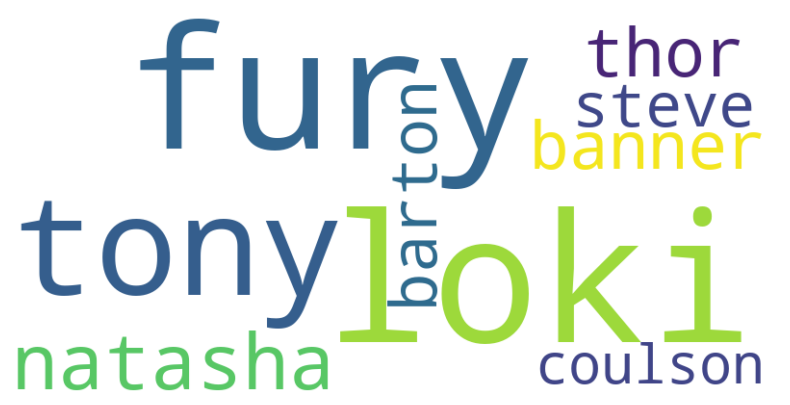

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#creating a dictionary from 'Counter' object 'character_freq'
character_freq_dict = dict(character_freq)

#generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(character_freq_dict)

#displaying the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text Summarization
---
Processing text using spaCy's pre-trained language model to calculate the importance score of each sentence <br>
Selecting the top 3 sentences with the highest scores as the summary of the script

In [15]:
#setup
import PyPDF2
import spacy

#loading the PDF file using open() in read binary mode
pdf_file = open('Avengers Script.pdf', 'rb')
pdf_reader = PyPDF2.PdfReader(pdf_file)

#extracting the text from each page of the PDF file and concatenating them to form a single string
text_sum = ''
for page in pdf_reader.pages:
    text_sum += page.extract_text()
text_sum

#deleting '\n' and '\r' via 'replace()'
text_sum = text_sum.replace('\n', ' ').replace('\r', '')
text_sum

'Marvel’s THE AVENGERS Written By Joss Whedon Story By Zak Penn and Joss Whedon Based on the characters appearing in the comic books Published by MARVEL Comics1 EXT. UNKNOWN AREA OF SPACE 1 Space, a floating staircase among the rocks...THE OTHER speaks to a DISEMBODIED FIGURE in a chair. THE OTHER (V.O) The Tesseract has awakened. It is on a little world, a human world. They would wield its power. THE OTHER hands LOKI a scepter with a glowing blue gem... THE OTHER (V.O) But our ally knows its workings as they never will. He is ready to lead. And our force... The CHITAURI put on their face mask and get ready. THE OTHER (V.O) ...our Chitauri, will follow. The world will be his...the universe, yours. And the humans, what can they do but burn? A 3d model of the Tesseract, we move inside it slowly 2 EXT. MOUNTAIN RANGE - EARLY NIGHT 2 A helicopter SPEEDS over this mountain at high-speed. The CAMERA pans up over the mountain and we see... 3 EXT. SHIELD/NASA FACILITY - CONTINUOUS 3 This base 

In [16]:
#loading spacy's english pre-trained language model
nlp1 = spacy.load('en_core_web_lg')

#applying nlp pipeline to process 'updated_text'
doc1 = nlp1(text_sum)

In [17]:
#calculating the importance score of each sentence
sentence_scores = {}

#creating a loop that iterates over each sentence in the 'doc1' object
for sent in doc1.sents:
    #calculating the sentence length
    sent_length = len(sent)
    
    #creating a loop that iterates over each token in the sentence
    for token in sent:
        #instruction: if the token is a stop word, skip
        if token.text.lower() in nlp1.Defaults.stop_words:
            continue
        
        #instruction: if the token is a punctuation mark, skip
        if token.is_punct:
            continue
        
        #instruction: if the token is a pronoun, skip
        if token.pos_ == 'PRON':
            continue
        
        #instruction: if the sentence is not already in 'sentence_scores', create a new entry
        if sent not in sentence_scores.keys():
            #adjusting the similarity score based on sentence length
            similarity_score = token.similarity(sent) * (1 - (sent_length / len(doc1)))
            sentence_scores[sent] = similarity_score
        
        #instruction: if the sentence is already in 'sentence_scores', the similarity score is added to the existing value  
        else:
            #adjusting the similarity score based on sentence length
            similarity_score = token.similarity(sent) * (1 - (sent_length / len(doc1)))
            sentence_scores[sent] += similarity_score

C:\Users\josep\AppData\Local\Temp\ipykernel_21552\1842755202.py:32: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  similarity_score = token.similarity(sent) * (1 - (sent_length / len(doc1)))
C:\Users\josep\AppData\Local\Temp\ipykernel_21552\1842755202.py:26: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  similarity_score = token.similarity(sent) * (1 - (sent_length / len(doc1)))


In [18]:
#creating a tuple and selecting the top 3 sentences with the highest score
summary_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)[:3]

#creating a list that contains each of the top 3 sentences
summary = [sentence[0] for sentence in summary_sentences]
print(summary)

[360 spin: The Avengers stand in a circle, Hulk roars, Hawkeye nocks an arrow, Thor readies Mjolnir, Black Widow loads her gun, Captain America stands ready and Iron Man hovers above them, landing next to the Hulk., A super soldier, a living legend who kind of lives up to the legend; a man with breath-taking anger management issues; a couple of master assassins, and you, big fella, you’ve managed to piss off every single one of them., The sign on the building reads: JOINT DARK ENERGY MISSION; WESTERN DIVISION; PROJECT PEGASUS, NASA SPACE RADIATION FACILITY, S.H.I.E.L.D ACCELERATOR TEST]


#### Insight:
The output of the text summarization model reveals: 
- Pivotal moments in the script where the Avengers unite, showcasing their unique abilities and equipment
- Relevant settings or subjects when mentioning Joint Dark Energy Mission, Western Division, and other topics